# **Deep Learning Lab: Transfer Learning**

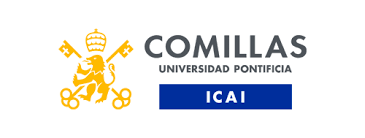

***

## Import packages

In [3]:
from utils.cnn import CNN
import torchvision
from utils.cnn import load_data
from utils.cnn import load_model_weights
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os
import json

## Model and data loading

In [4]:
# Load data and model 
train_dir = '../data/training'
valid_dir = '../data/validation'

train_loader, valid_loader, num_classes = load_data(train_dir, 
                                                    valid_dir, 
                                                    batch_size=32, 
                                                    img_size=224)

## Predict

#### Load model

In [6]:
# Load model
model_weights = load_model_weights('resnext101_32x8d-100epochs')
my_trained_model = CNN(torchvision.models.resnext101_32x8d(weights='DEFAULT'), num_classes)
my_trained_model.load_state_dict(model_weights)

c:\MBD_Repos\machineLearning_II\src\utils\cnn.py:264: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename+'.pt')


<All keys matched successfully>

## Results

In [7]:
predicted_labels = my_trained_model.predict(valid_loader)

In [9]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

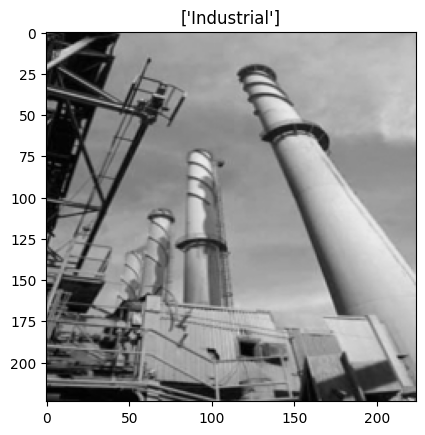

In [33]:
random_indices = np.random.choice(len(valid_loader.dataset), size=1, replace=False)
inputs = []
classes = []
for i in random_indices:
    inputs.append(valid_loader.dataset[i][0])
    classes.append(predicted_labels[i])

out = torchvision.utils.make_grid(inputs)
classnames = train_loader.dataset.classes
imshow(out, title=[classnames[x] for x in classes])
